<h3>Import Required Libraries</h3>

In [1]:
# Import basic libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Import libraries for timeseries RNN LSTM neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [3]:
# Import KERAS:TimeseriesGenerator

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Import KERAS:MinMaxScaler
# This class is used to preprocess (scale) the data

from sklearn.preprocessing import MinMaxScaler

<h3>AAPL (Apple Stock : 01/01/2014 - 06/30/2019)<h3>

In [4]:
dataset_path = "AAPL_01012014-06302019.csv"

In [5]:
# Load the dataset

df_ALL = pd.read_csv(dataset_path)

In [6]:
# the first five rows to be loaded

df_ALL.head()

,Date,Close
0,1/2/2014 16:00,19.75
1,1/3/2014 16:00,19.32
2,1/6/2014 16:00,19.43
3,1/7/2014 16:00,19.29
4,1/8/2014 16:00,19.41


<h3>Exploratory Data Analysis (EDA)</h3>

In [7]:

df_ALL.shape

(1382, 2)

In [8]:
# Determine the different forms of variables data

df_ALL.dtypes

,0
Date,object
Close,float64


In [9]:
# Statistics Summary

df_ALL.describe()

,Close
count,1382.000000
mean,33.960883
std,9.729851
min,17.850000
25%,26.502500
50%,31.460000
75%,42.325000
max,58.020000


In [10]:

df = df_ALL.iloc[:,1:2]

In [11]:
df.head()

,Close
0,19.75
1,19.32
2,19.43
3,19.29
4,19.41


<Axes: >

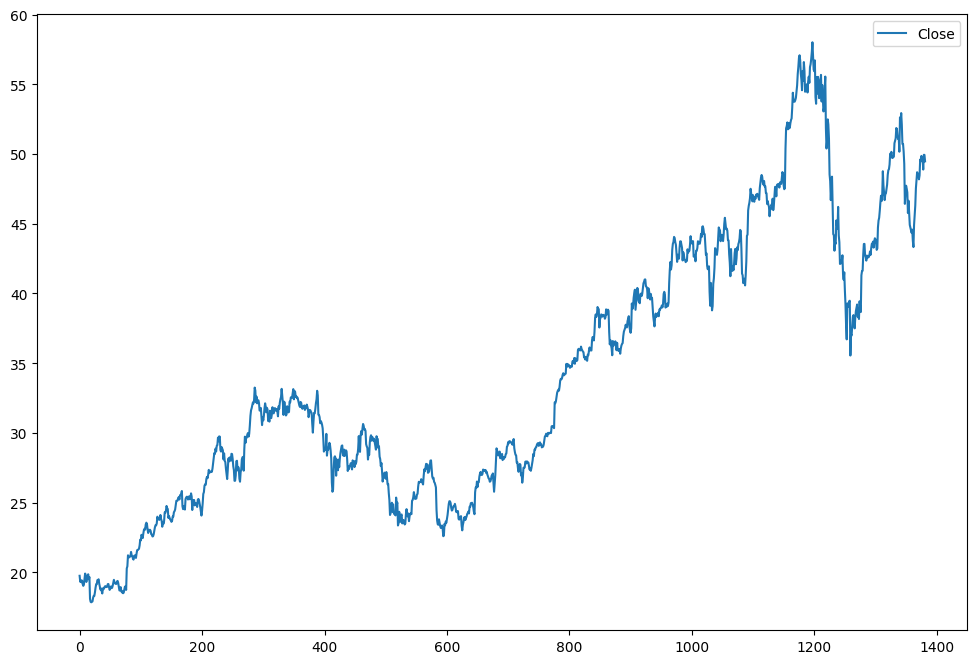

In [12]:
# Plot Closing Price

df.plot(figsize=(12,8))

<h3>Length of Input Time Series - Number of Input Time Steps</h3>

In [13]:
# set the input sequence's length
# Here we are using 60 consecutive closing prices to predict the next one
# It means that 60 consecutive  closing prices will be used to predict the next one

length60 = 60

In [14]:
length60

60

<h3>Time Series Dataset: Train/Test Split</h3>

In [15]:
len(df)

1382

In [16]:
# Data used for testing at a specific percentage

test_percent = 0.1

In [17]:
# number of data points set aside for model testing
#20 % of the original dataset
len(df)*test_percent

138.20000000000002

# Split Data-->Train/Test

In [18]:
# Need to find the length (number of data points)of the testing dataset.
# To the nearest decimal, round the test data points.

test_length = np.round(len(df)*test_percent)
test_length

138.0

In [19]:
# Index of the testing data

split_index = int(len(df)-test_length)
split_index

1244

In [20]:
# Training Dataset

data_train = df.iloc[: split_index]

# Testing Dataset
# All the indicies from (split_index - length60) to the end of the dataframe
# split_index - length60: Need the last 60 historical data points (belong to data_train) to predict the first data point of the data_test

data_test = df.iloc[split_index - length60 :]


In [21]:
data_train.head()

,Close
0,19.75
1,19.32
2,19.43
3,19.29
4,19.41


In [22]:
data_train.tail()

,Close
1239,46.21
1240,44.17
1241,43.68
1242,42.12
1243,42.40


In [23]:
data_test.head()

,Close
1184,55.96
1185,54.47
1186,54.56
1187,54.59
1188,55.01


In [24]:
data_test.tail()

,Close
1377,49.65
1378,48.89
1379,49.95
1380,49.94
1381,49.48


<h3>Normalize Data (Scale it into the range [0, 1])</h3>

In [25]:
# Create a MinMaxScaler to normalize the data

scaler = MinMaxScaler()

In [26]:
# Train the scaler to perform the normalization (only training data)

scaler.fit(data_train)

MinMaxScaler()

In [27]:
# Normalize the training dataset

normalized_train = scaler.transform(data_train)

# Normalize the testing dataset

normalized_test = scaler.transform(data_test)

<h3>Create TimeseriesGenerator for Training</h3>

In [28]:

batch_size32 = 32

# Creating a TimeseriesGenerator for Training
#T imeSeriesGenerator(input, output, length, batch_size)

train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length=length60, batch_size=batch_size32)

In [29]:
# Length of the normalized training dataset

len(normalized_train)

1244

In [30]:
len(train_tsGenerator60)

37

In [31]:
# Check the first batch

X,y = train_tsGenerator60[0]

In [32]:
print(X)

[[[0.04729898]
  [0.03659447]
  [0.03933284]
  ...
  [0.03559871]
  [0.03360717]
  [0.03286034]]

 [[0.03659447]
  [0.03933284]
  [0.03584765]
  ...
  [0.03360717]
  [0.03286034]
  [0.03286034]]

 [[0.03933284]
  [0.03584765]
  [0.03883495]
  ...
  [0.03286034]
  [0.03286034]
  [0.03709236]]

 ...

 [[0.03958178]
  [0.03933284]
  [0.04107543]
  ...
  [0.08215086]
  [0.07841673]
  [0.07617625]]

 [[0.03933284]
  [0.04107543]
  [0.03335823]
  ...
  [0.07841673]
  [0.07617625]
  [0.08264874]]

 [[0.04107543]
  [0.03335823]
  [0.0278815 ]
  ...
  [0.07617625]
  [0.08264874]
  [0.08364451]]]


In [33]:
print (y)

[[0.03286034]
 [0.03709236]
 [0.03808813]
 [0.03460294]
 [0.02837939]
 [0.02116007]
 [0.02091113]
 [0.02713468]
 [0.02116007]
 [0.01767488]
 [0.01941748]
 [0.01618123]
 [0.017177  ]
 [0.02240478]
 [0.0278815 ]
 [0.02837939]
 [0.02215584]
 [0.06049291]
 [0.06422704]
 [0.08389345]
 [0.08215086]
 [0.08015932]
 [0.08140403]
 [0.0823998 ]
 [0.08986806]
 [0.08414239]
 [0.08215086]
 [0.07841673]
 [0.07617625]
 [0.08264874]
 [0.08364451]
 [0.08364451]]


<h3>Build, Train, and Test Model</h3></n></n><h3>Build LSTM Model</h3>

In [34]:
# We are using only one feature, i.e., Close Price

n_features = 1

In [35]:
# Define model

model = Sequential()

# Add an LSTM layer
# This layer has 50 LSTM cells
# Activation function: relu
# MUST: return_sequence= True

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length60, n_features)))

# Dropout Layer

model.add(Dropout(0.2))

# Add 2nd LSTM layer
#MUST: return_sequence= True

model.add(LSTM(units=50, activation='relu', return_sequences=True))

# Dropout Layer

model.add(Dropout(0.2))

# Add 3rd LSTM layer

model.add(LSTM(units=50, activation='relu'))

# Add a fully-connected layer for the final prediction

model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<h3>Compile Model</h3>

In [36]:
# Compile Model

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

<h3>Train (fit) model using fit_generator()</h3>

In [37]:
# Train the model

model.fit(train_tsGenerator60, epochs=100)

Epoch 1/100
 1/37 ━━━━━━━━━━━━━━━━━━━━ 3:37 6s/step - loss: 0.0626

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - loss: 0.0765
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0289
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0105
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0152
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0090
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - loss: 0.0051
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0073
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0051
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0031
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.0042
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0018
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0059
Epoch 13/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 0.0025
Epoch 14/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0040
Epoch 15/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0

<h3>Visualize Model's Performance after Training</h3>

In [38]:
loss_history_keys = model.history.history.keys()
loss_history_keys

dict_keys(['loss'])

<Axes: >

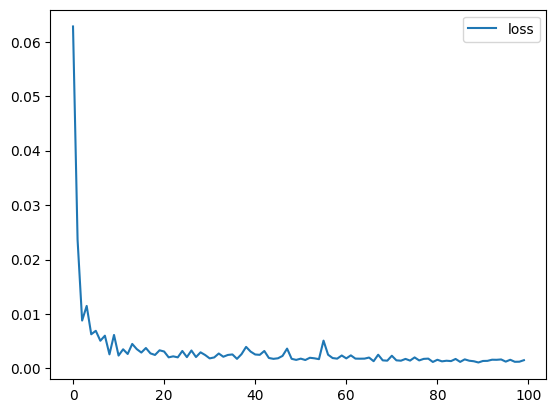

In [39]:
# Load the loss data (model.history.history) into a data frame

ds_model_loss = pd.DataFrame(model.history.history)

# Visualize the loss data using DataFrame.plot()

ds_model_loss.plot()

<h3>Prediction for Testing: Using TimeseriesGenerator</h3></n></n><h5>Create TimeseriesGenerator for Testing</h5>

In [40]:
# Batch Size is 1

batch_size1 = 1

# Create a TimeseriesGenerator for testing: test_tsGenerator

test_tsGenerator60 = TimeseriesGenerator(normalized_test, normalized_test, length=length60, batch_size=batch_size1)

## <h5>Predict Future Data Points for Testing</h5>

In [41]:
normalized_prediction = model.predict(test_tsGenerator60)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


In [42]:
# Prediction is a numpy 2D array with only one column

normalized_prediction

array([[0.6446574 ],
       [0.63972676],
       [0.6339963 ],
       [0.62838894],
       [0.6222772 ],
       [0.6155401 ],
       [0.60888505],
       [0.6016972 ],
       [0.5933936 ],
       [0.58310246],
       [0.57053274],
       [0.55829585],
       [0.54733276],
       [0.53818834],
       [0.5313136 ],
       [0.5266975 ],
       [0.5211711 ],
       [0.5151393 ],
       [0.5087958 ],
       [0.5029705 ],
       [0.4984918 ],
       [0.49565724],
       [0.4941212 ],
       [0.4931536 ],
       [0.4929889 ],
       [0.49388412],
       [0.49589515],
       [0.49896494],
       [0.5020771 ],
       [0.50490075],
       [0.50700706],
       [0.50929356],
       [0.51165396],
       [0.5136784 ],
       [0.5173341 ],
       [0.5230607 ],
       [0.530537  ],
       [0.54005474],
       [0.5515689 ],
       [0.56437045],
       [0.5768327 ],
       [0.58790827],
       [0.5968657 ],
       [0.60385436],
       [0.6088486 ],
       [0.61223894],
       [0.61428016],
       [0.615

In [43]:
len(normalized_prediction)

138

In [44]:
# Convert normalized predictions back to the true values

prediction = scaler.inverse_transform(normalized_prediction)

In [45]:
# Flatten all the 2D array

prediction_index = np.arange(1244, 1382, step=1)
df_prediction = pd.DataFrame(data=prediction,index=prediction_index, columns=['Prediction'])

In [46]:
df_prediction

,Prediction
1244,43.745888
1245,43.547825
1246,43.317635
1247,43.092384
1248,42.846878
...,...
1377,48.286678
1378,48.532227
1379,48.693626
1380,48.816139


<h3>Visualize Prediction</h3>

<Axes: >

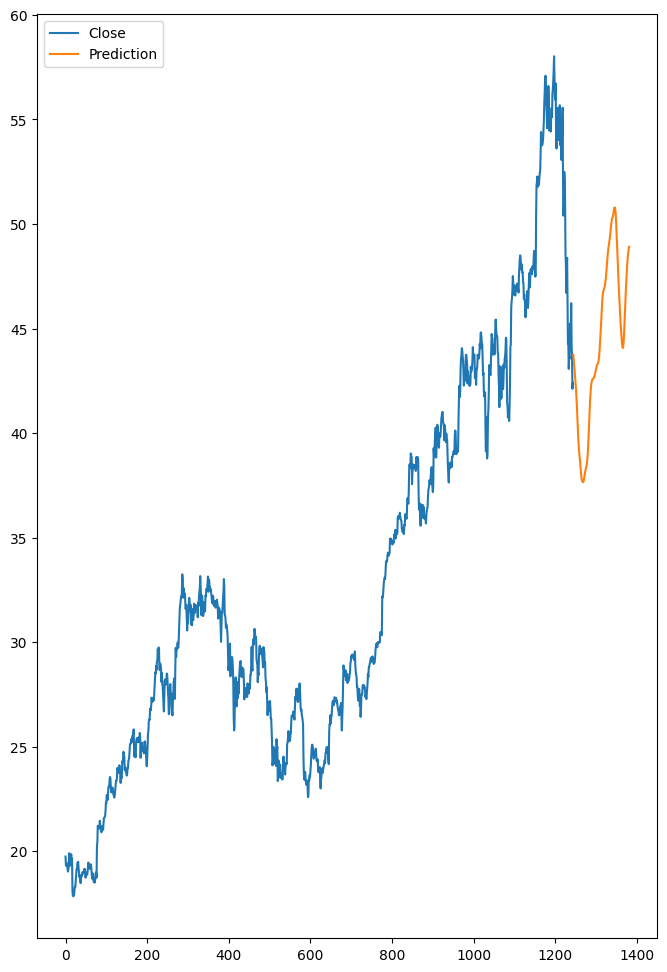

In [47]:
ax = data_train.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

<h3>Visualize Prediction and Compare Actual Close Price</h3>

<Axes: >

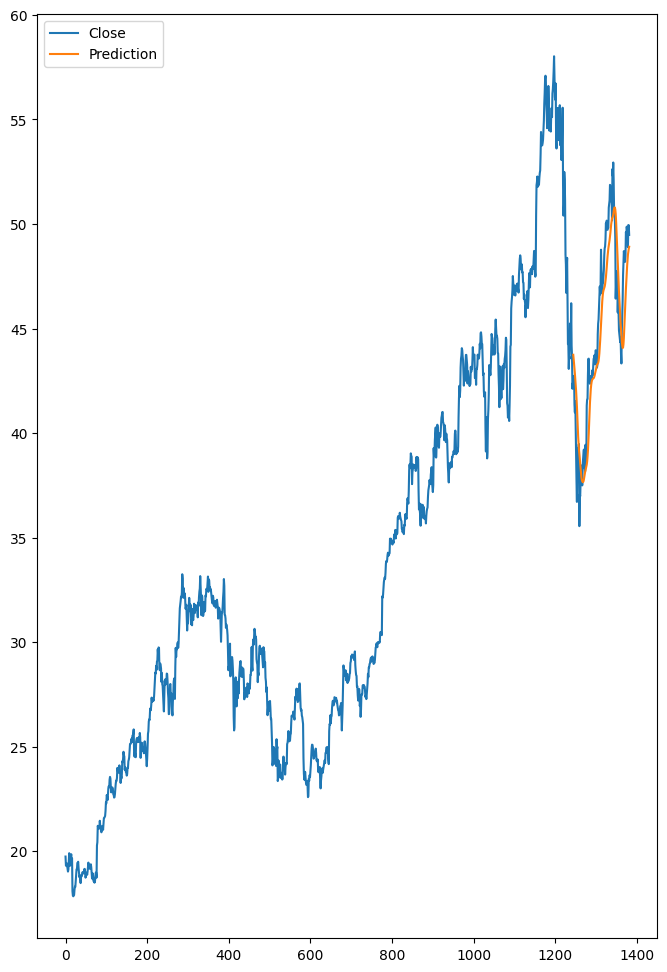

In [48]:
ax = df.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

<h3>Time Series Forecasting with LSTM</h3></n></n><h5>Preprocess Full Input Dataset</h5>

In [49]:
# Using MinMaxScaler to normalize the full dataset df

full_scaler = MinMaxScaler()
normalized_full_data = full_scaler.fit_transform(df)

<h3>Create TimeSeriesGenerator for Forecasting</h3>

In [50]:
# Number of steps of the input timeseries

length60

60

In [51]:
# Create Timeseries Generator for forecasting

forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=length60, batch_size=batch_size32)

<h3>Build, Compile, and fit LSTM Model for Forecasting</h3>

In [52]:
# Train/Fit LSTM Model

model.fit(forecast_tsGenerator, epochs = 100)

Epoch 1/100
 2/42 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 5.7391e-04 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 0.0017
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.0017
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 0.0015
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 0.0022
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 0.0015
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.0016
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - loss: 0.0015
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0012
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0019
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0013
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 0.0017
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0013
Epoch 13/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 0.0014
Epoch 14/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.0016
Epoch 15/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.

<h3>Time Series Forecasting Using LSTM Neural Network </h3>

In [53]:
forecast = []

# Set periods with the time span of forecasting
# Let's forecast for the next 107 business days (07/01/2019- 12/15/2019)
periods = 107

first_eval_batch = normalized_full_data[-length60:]
current_batch = first_eval_batch.reshape((1, length60, n_features))

for i in range(periods):

    #get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])

    current_pred = model.predict(current_batch)[0]

    #store prediction

    forecast.append(current_pred)

    # update batch now include prediction and drop first value

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━

<h3>Inverse to Transform Normalized Data Back into True Values</h3>

In [54]:
forecast = full_scaler.inverse_transform(forecast)
forecast

array([[48.11149325],
       [47.85412795],
       [47.43190423],
       [46.93927558],
       [46.43945678],
       [45.96546072],
       [45.53052557],
       [45.1348716 ],
       [44.77394484],
       [44.44215214],
       [44.13445108],
       [43.84674257],
       [43.57581345],
       [43.31912814],
       [43.07465624],
       [42.84073131],
       [42.61597902],
       [42.39926206],
       [42.18962511],
       [41.98627802],
       [41.78857195],
       [41.59616451],
       [41.4086319 ],
       [41.22558864],
       [41.04671389],
       [40.87174188],
       [40.70044275],
       [40.53259383],
       [40.36800837],
       [40.20649722],
       [40.04789516],
       [39.892037  ],
       [39.73877666],
       [39.58797051],
       [39.43948445],
       [39.29318919],
       [39.14896741],
       [39.006697  ],
       [38.86649767],
       [38.72872379],
       [38.59305691],
       [38.45929591],
       [38.32730671],
       [38.19697437],
       [38.068172  ],
       [37

In [55]:
df

,Close
0,19.75
1,19.32
2,19.43
3,19.29
4,19.41
...,...
1377,49.65
1378,48.89
1379,49.95
1380,49.94


<h3>Creating new timestamp index with pandas</h3>

In [56]:
# Calculate forecast index

forecast_index = np.arange(1382, 1489, step=1)

In [57]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index, columns=['Forecast'])
forecast_df

,Forecast
1382,48.111493
1383,47.854128
1384,47.431904
1385,46.939276
1386,46.439457
...,...
1484,31.630551
1485,31.573546
1486,31.520249
1487,31.470424


<h3>Plot the Forecast</h3>

<Axes: >

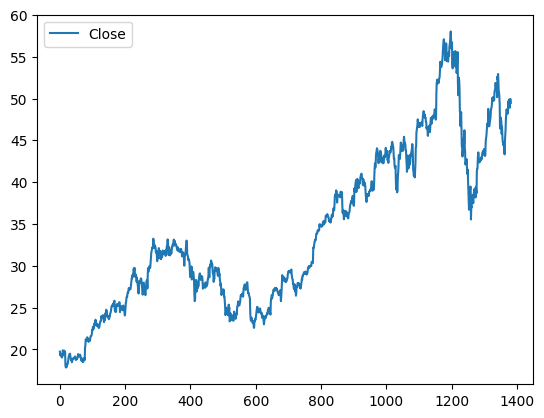

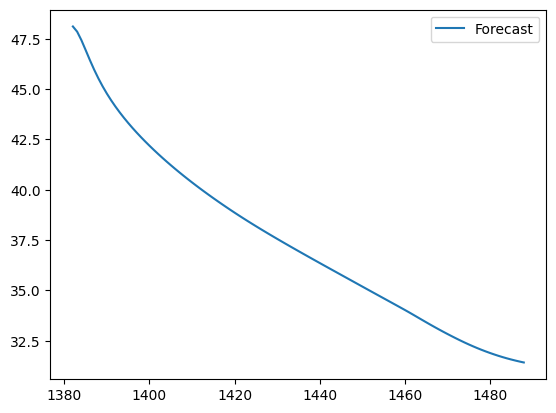

In [58]:
df.plot()
forecast_df.plot()

<h3>Joining Pandas Plots</h3>

<Axes: >

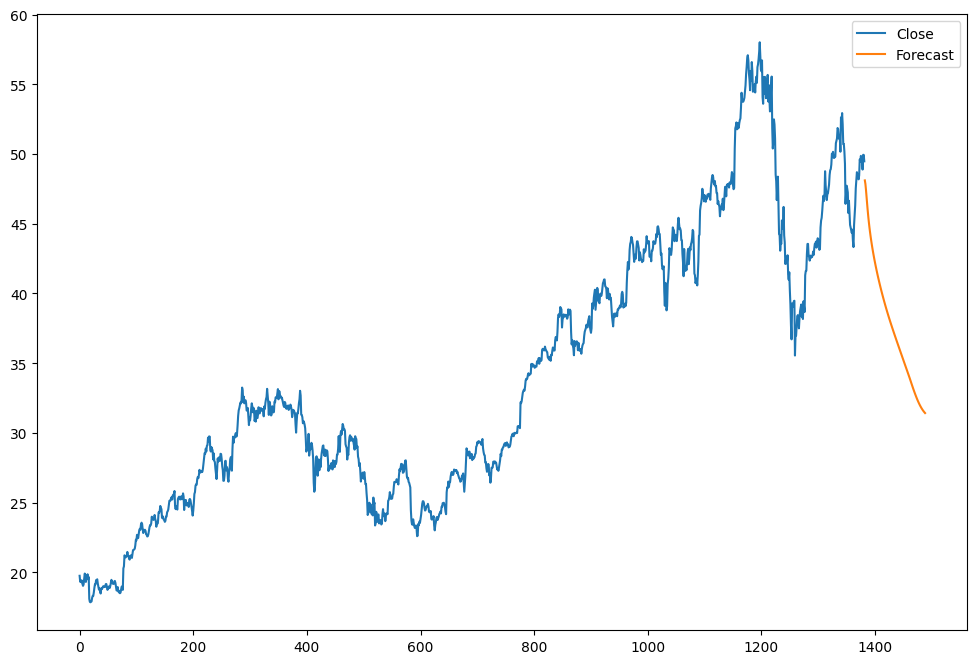

In [59]:
ax = df.plot()
forecast_df.plot(ax=ax, figsize=(12, 8))

In [60]:
dir_path_dataset_2 = 'AAPL_20190701-20191215.csv'

In [61]:
df_ALL_JUL_DEC_2019 = pd.read_csv(dir_path_dataset_2)

In [62]:
df_ALL_JUL_DEC_2019.head()

,Date,Close
0,7/1/2019 16:00:00,50.39
1,7/2/2019 16:00:00,50.68
2,7/3/2019 13:00:00,51.10
3,7/5/2019 16:00:00,51.06
4,7/8/2019 16:00:00,50.01


In [63]:
df_ALL_JUL_DEC_2019 = df_ALL_JUL_DEC_2019.iloc[:,1:2]
df_ALL_JUL_DEC_2019

,Close
0,50.39
1,50.68
2,51.10
3,51.06
4,50.01
...,...
112,66.73
113,67.12
114,67.69
115,67.86


<Axes: >

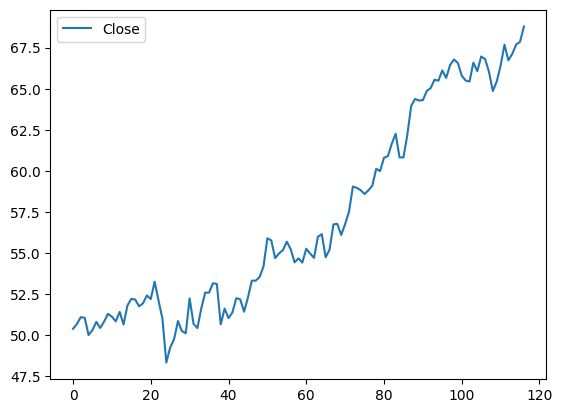

In [64]:
df_ALL_JUL_DEC_2019.plot()

In [65]:
forecast_df['Forecast'].values

array([48.11149325, 47.85412795, 47.43190423, 46.93927558, 46.43945678,
       45.96546072, 45.53052557, 45.1348716 , 44.77394484, 44.44215214,
       44.13445108, 43.84674257, 43.57581345, 43.31912814, 43.07465624,
       42.84073131, 42.61597902, 42.39926206, 42.18962511, 41.98627802,
       41.78857195, 41.59616451, 41.4086319 , 41.22558864, 41.04671389,
       40.87174188, 40.70044275, 40.53259383, 40.36800837, 40.20649722,
       40.04789516, 39.892037  , 39.73877666, 39.58797051, 39.43948445,
       39.29318919, 39.14896741, 39.006697  , 38.86649767, 38.72872379,
       38.59305691, 38.45929591, 38.32730671, 38.19697437, 38.068172  ,
       37.94077749, 37.81466873, 37.68972481, 37.56584157, 37.44291246,
       37.3208489 , 37.19956829, 37.07899759, 36.95906617, 36.8397034 ,
       36.72085422, 36.60246235, 36.48446673, 36.3668183 , 36.24946676,
       36.13236184, 36.01545205, 35.8986943 , 35.78203592, 35.6654314 ,
       35.54883407, 35.43219963, 35.3154778 , 35.19875716, 35.08

In [66]:
# Get the length difference between the two DataFrames
diff = len(df_ALL_JUL_DEC_2019) - len(forecast_df)

# If forecast_df is shorter, pad it with NaN values
if diff > 0:
    padding = [np.nan] * diff  # Create a list of NaN values
    forecast_values = np.concatenate([forecast_df['Forecast'].values, padding])
# If forecast_df is longer, trim it
elif diff < 0:
    forecast_values = forecast_df['Forecast'].values[:len(df_ALL_JUL_DEC_2019)]
else:
    forecast_values = forecast_df['Forecast'].values

# Now assign the values to the new column
df_ALL_JUL_DEC_2019['Forecast'] = forecast_values

In [67]:
#df_ALL_JUL_DEC_2019['Forecast'] = forecast_df['Forecast'].values
#df_ALL_JUL_DEC_2019

<Axes: >

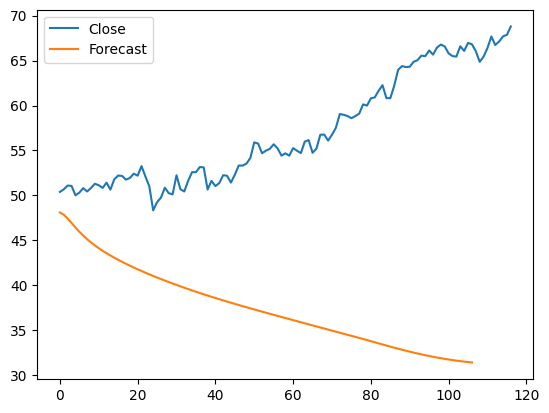

In [68]:
df_ALL_JUL_DEC_2019.plot()